# PROJETO 2: Dados do Titanic

#### Vamos começar importando o `pandas` e chamá-lo de `pd`
- O pandas é uma biblioteca do Python que facilita o uso de alguns comandos. 
- Após importar o pandas, damos o comando `pd.read_csv` que vai ler o arquivo de valores separados por vírgulas (.csv) e salvar todos os dados do arquivo na variável que criamos `df_tn` (df é a abreviação de data frame)
- Depois disso, usamos o comando `.head()` para visualizar o cabeçalho do data frame, que vai imprimir as 5 primeiras linhas

In [1]:
import pandas as pd
% matplotlib inline

df_tn = pd.read_csv('titanic-data-6.csv')
df_tn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,725.0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,805.0,NaN,S


Fazendo uma análise inicial nos dados, podemos pensar em quais perguntas podem ser feitas. Neste relatório vamos responder apenas algumas, mas a verdade é que podemos investigar várias questões. Todo o trabalho que faremos aqui vai ser como se fossemos um "Detetive".

Vamos lá: sabemos que a classe do bilhete comprado (`pclass`) provavelmente indica a condição financeira dos passageiros. Sendo assim, a pergunta principal que queremos responder é:

# Qual a relação entre os sobreviventes e a classe do bilhete?

### Visão geral dos dados:

Número de amostras e colunas:

In [2]:
df_tn.shape

(891, 12)

Informações dos dados:

In [3]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Número de linhas duplicadas:

In [4]:
sum(df_tn.duplicated())

0

Tipos dos dados:

In [5]:
df_tn.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Valores únicos dos dados:

In [6]:
df_tn.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             87
SibSp            7
Parch            7
Ticket         681
Fare           247
Cabin          147
Embarked         3
dtype: int64

Essas etapas iniciais de visualização dos dados servem para que saibamos quais as medidas de limpeza de dados podemos tomar. Para fazer uma análise coerente, algumas coisas precisam ser alteradas.

### Limpeza de Dados:

Primeiro, vamos renomear os rótulos das colunas para colocar tudo em letra minúscula:

In [8]:
df_tn.rename(columns=lambda x: x.strip().lower(), inplace=True)

Nota-se que a coluna `age` tem valores ausentes, por isso vamos preencher essas linhas com a média dos valores:  

In [9]:
df_tn['age'].fillna(df_tn['age'].mean(), inplace=True)

Descartamos a coluna `cabin`, `ticket` e `passengerid` por não serem relevantes para as perguntas que queremos responder:

In [10]:
df_tn.drop(['cabin', 'ticket', 'passengerid'], axis=1, inplace=True)

Percebemos que a coluna `embarked` possui dois valores ausentes. Não é possível simplesmente preencher essa coluna pois ela é uma `string`, diferente da coluna `age` que é numérica. Para resolver esse problema, vamos primeiramente visualizar qual foi o porto de embarque mais usado por cada classe de bilhete. Depois vamos selecionar os dois passageiros com dados faltantes de `embarked` e completar conforme a classe do seu bilhete: `pclass`.

In [11]:
df_tn.groupby(['embarked']).mean()['pclass']

embarked
C    1.886905
Q    2.909091
S    2.350932
Name: pclass, dtype: float64

O que fizemos aqui foi obter um taxa média de embarque. Podemos perceber aqui que a maioria dos passageiros da 1ª classe embarcaram no porto de Cherbourg, a maioria da 2ª classe no porto de Queenstown e a maioria da 3ª classe embarcaram no porto de Southampton.
Agora selecionamos os passageiros com dados faltando:

In [12]:
df_tn[df_tn['embarked'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


Encontramos os dois passageiros que tem valores nulos em `embarked`. Observe que a classe do bilhete dos passageiros é 1ª classe. Associando com a taxa média, a maioria das pessoas dessa classe embarcaram no porto de Cherbourg, logo, vamos preencher esses dados faltantes com o porto `C`:

In [13]:
df_tn.loc[61, 'embarked'] = 'C'
df_tn.loc[829, 'embarked'] = 'C'

Conferindo a alteração:

In [14]:
df_tn.iloc[61]

survived                      1
pclass                        1
name        Icard, Miss. Amelie
sex                      female
age                          38
sibsp                         0
parch                         0
fare                         80
embarked                      C
Name: 61, dtype: object

In [15]:
df_tn.iloc[829]

survived                                            1
pclass                                              1
name        Stone, Mrs. George Nelson (Martha Evelyn)
sex                                            female
age                                                62
sibsp                                               0
parch                                               0
fare                                               80
embarked                                            C
Name: 829, dtype: object

Podemos ver que agora a coluna `embarked` está preenchida.

### Comos dados preenchidos, também podemos verificar: qual o total de passageiros que embarcaram em cada porto?

In [16]:
print('Total de passageiros que embarcaram nos portos:')
print('Cherbourg (C) = {}\nQueenstown (Q): {}\nSouthampton (S): {}'.format( sum(df_tn['embarked'] == 'C'),\
                                       sum(df_tn['embarked'] == 'Q'), sum(df_tn['embarked'] == 'S')))
      

Total de passageiros que embarcaram nos portos:
Cherbourg (C) = 170
Queenstown (Q): 77
Southampton (S): 644


#### Podemos ver que o porto que mais embarcou passageiros foi o `S`, seguido por `C` e por último o porto `Q`. Isso já começa a nos dar alguns insights sobre a resposta que procuramos.

In [17]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


### Agora que não temos mais valores ausentes, vamos ajustar os tipos dos dados

Vejamos que o tipo da variável `age` é `float`. Vamos alterar para `int`, afinal, ninguém pode ter 23,0 anos!

In [18]:
df_tn['age'] = df_tn['age'].astype(int)

In [19]:
df_tn.dtypes

survived      int64
pclass        int64
name         object
sex          object
age           int32
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

Vamos salvar os dados após as alterações em um novo arquivo chamado `titanic_data.csv`, fazer a leitura desse novo arquivo e salvar na váriavel df_tn:

In [20]:
df_tn.to_csv('titanic_data.csv')
df_tn = pd.read_csv('titanic_data.csv', index_col=0)
df_tn.head(3)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,725.0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,712833.0,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7925.0,S


## Explorando os dados

Número de passageiros de cada classe:

In [21]:
print('1ª classe: {}'.format(sum(df_tn['pclass'] == 1)))
print('2ª classe: {}'.format(sum(df_tn['pclass'] == 2)))
print('3ª classe: {}'.format(sum(df_tn['pclass'] == 3)))
tot = len(df_tn)
print('Total: {}'.format(tot))

1ª classe: 216
2ª classe: 184
3ª classe: 491
Total: 891


Número de sobreviventes e não sobreviventes:

In [22]:
print('Sobreviventes: {}\nNão sobreviventes: {}\nTotal de passageiros'.format(sum(df_tn['survived'] == 1), sum(df_tn['survived'] == 0)))

Sobreviventes: 342
Não sobreviventes: 549
Total de passageiros


Selecionando os sobreviventes e não sobreviventes:

In [23]:
df_sv = df_tn.query('survived == "1"')
df_nsv = df_tn.query('survived == "0"')

Número de sobreviventes e não sobreviventes de cada classe de ticket:

In [24]:
print('SOBREVIVENTES\n1ª classe: {}\n2ª classe: {}\n3ª classe: {}\n'.format(sum(df_sv['pclass']== 1), sum(df_sv['pclass'] == 2),\
                                                                                                      sum(df_sv['pclass'] == 3)))
print('NÃO SOBREVIVENTES\n1ª classe: {}\n2ª classe: {}\n3ª classe: {}'.format(sum(df_nsv['pclass'] == 1),\
                                                                       sum(df_nsv['pclass'] == 2), sum(df_nsv['pclass'] == 3)))

SOBREVIVENTES
1ª classe: 136
2ª classe: 87
3ª classe: 119

NÃO SOBREVIVENTES
1ª classe: 80
2ª classe: 97
3ª classe: 372


#### Através desses dados, é possível perceber que o número de sobreviventes da 1ª classe é superior ao número da 3ª classe mesmo que houvesse menos da metade dos passageiros que havia na 3ª classe. Mesmo que já estejam nos aproximando de conclusões, é sempre interessante fazer uma análise visual. Inclusive, ressalto que a habilidade de plotar gráficos é uma arte!

Começamos com a criação de uma função para gerar dois gráficos de pizza simplificados no qual é possível observar visualmente as diferenças. Para isso, criamos uma variável dentro da função (`ord_sv`) para separar a ordem de sobreviventes e de não sobreviventes respectivamente e plotá-las nos gráficos:

In [25]:
def plot_surv(data):
    ord_sv = data['pclass'].value_counts().index
    data['pclass'].value_counts()[ord_sv].plot(kind='pie', figsize=(5, 5), title='SOBREVIVENTES DE CADA CLASSE');

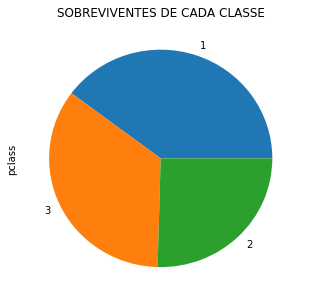

In [26]:
plot_surv(df_sv)

Podemos observar aqui que os sobreviventes da 1ª classe abrangem quase metade do total de sobreviventes. Agora aplicamos `df_nsv` na função:

Text(0.5,1,'NÃO SOBREVIVENTES POR CLASSE')

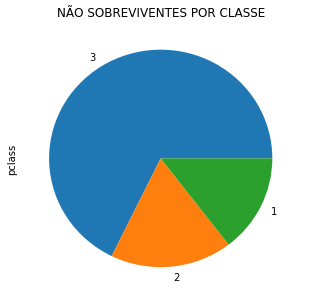

In [27]:
import matplotlib.pyplot as plt
plot_surv(df_nsv)
plt.title('NÃO SOBREVIVENTES POR CLASSE')

Aqui, percebemos que o número de não sobreviventes da 3ª classe abrange mais da metade do total dos não sobreviventes.

E abaixo temos dois gráficos em barras:

Text(0.5,1,'Quantidade de sobreviventes por classe')

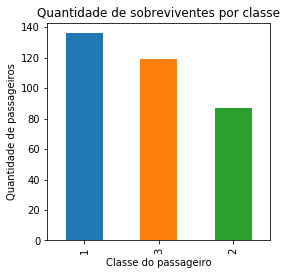

In [28]:
import matplotlib.pyplot as plt
def plot_surv_bar(data):
    ord_sv = data['pclass'].value_counts().index
    data['pclass'].value_counts()[ord_sv].plot(kind='bar', figsize=(4, 4));
    plt.xlabel('Classe do passageiro')
    plt.ylabel('Quantidade de passageiros')
plot_surv_bar(df_sv)
plt.title('Quantidade de sobreviventes por classe')

No gráfico em barras retificamos as proporções. Visualmente podemos perceber que os sobreviventes da 2ª classe são apenas um pouco maior que a metade dos sobreviventes da 1ª classe. Claramente percebemos que os passageiros da primeira classe tiveram mais probabilidade de sobrevivência.

Text(0.5,1,'Quantidade de não sobreviventes por classe')

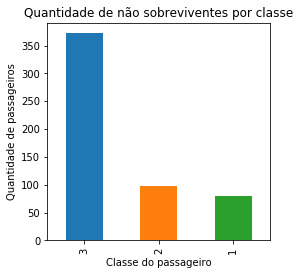

In [29]:
import matplotlib.pyplot as plt
plot_surv_bar(df_nsv)
plt.title('Quantidade de não sobreviventes por classe')

Esse gráfico é impressionante! O número de pessoas que não sobreviveram na 3ª classe foi mais do que 3 vezes mais que cada uma das outras duas classes

#### Mas podemos responder mais algumas perguntas. Para isso precisamos fazer mais algumas operações:

Vamos calcular as médias de idade:

In [30]:
df_sma = df_sv['age'].mean()
df_nma = df_nsv['age'].mean()
print('Média de idade dos sobreviventes: {}\nMédia de idade dos não sobreviventes: {}'.format((df_sma), (df_nma)))

Média de idade dos sobreviventes: 30.0906432748538
Média de idade dos não sobreviventes: 30.468123861566486


Apesar da diferença ser pequena, percebe-se que em geral as pessoas que morreram na tragédia eram mais velhas

#### Já temos algumas respostas, mas qual será o gênero mais comum entre os sobreviventes e os não sobreviventes?
Vamos responder isso!
Primeiro vamos ver qual o total de homens e mulheres

In [31]:
print("Total de mulheres: {}\nTotal de homens: {}".format(sum(df_tn['sex'] == 'female'), sum(df_tn['sex'] == 'male')))

Total de mulheres: 314
Total de homens: 577


Agora vamos ver o total de homens e mulheres entre os sobreviventes e os não sobreviventes

In [32]:
print('SOBREVIVENTES\nTotal de mulheres = {}\nTotal de homens: {}\n'.format(sum(df_sv['sex'] == 'female'), sum(df_sv['sex'] == 'male')))
print('NÃO SOBREVIVENTES\nTotal de mulheres = {}\nTotal de homens: {}'.format(sum(df_nsv['sex'] == 'female'), sum(df_nsv['sex'] == 'male')))

SOBREVIVENTES
Total de mulheres = 233
Total de homens: 109

NÃO SOBREVIVENTES
Total de mulheres = 81
Total de homens: 468


#### Incrível! Entre os sobreviventes, as mulheres foram mais da metade. Enquanto isso o número de homens não sobreviventes foi quase 6x maior que número de mulheres.

## Conclusão

### Limitações

Conseguimos responder algumas perguntas e chegar a algumas conclusões, porém algumas limitações impedem que análises mais profundas possam ser feitas. O fato de termos valores ausentes em `age` e em `embarked` acaba por não nos dar uma conclusão tão perfeita sobre os dados que temos em mãos, embora no caso de `embarked` a diferença não seria relevante. Também poderíamos fazer análises mais profundas caso tivéssemos outros tipos de dados, por exemplo o número de botes salva-vidas disponíveis do navio antes e após a catástrofe, a capacidade interna máxima de cada um e até mesmo quantas pessoas o bote precisaria ter para afundar. Assim poderíamos prever quantas pessoas poderiam ter sido salvas e quantas realmente sobreviveram e fazer uma leitura melhor do que aconteceu nesse terrível acidente.

### Conclusão final

Através de algumas análises rápidas nós conseguimos descobrir algumas respostas valiosas. Por exemplo, descobrimos que as  mulheres que fossem da 1ª classe teriam mais chances de sobreviver. A maior probabilidade de morte desse acontecimento é de homens e que fossem das classes inferiores. A relação idade, gênero e classe do ticket foram altamente influenciáveis na sobrevivência de uma pessoa. Apesar de não usarmos outras colunas nessa análise, outras respostas poderiam ser obtidas como o número de familiares presentes no navio, os preços pagos pelos tickets e até mesmo algo relacionado ao número das cabines.